# Bias and Variance Tradeoff
In this notebook we will explore the bias-variance tradeoff.  The goal of the exercise is to understand how the bias and variance of a model change as we change the complexity of the model.
We will use two models to explore this tradeoff.  The first model is a DecisionTreeRegressor and the second is a polynomial model.  We will use the same data set for both models.  The data is about the Melbourne Housing Market.  The data set contains 13580 observations and 21 features.  The target variable is the price of the house.  The features are a mix of categorical and numerical variables.
We will also explore the concept of overfitting and underfitting.


# Read the data

The data set is available in the file melb_data.csv.  Make sure that datatypes are correct. For example, the `Date` column should be a `datetime` object, not a string. Some columns should be categorical, not numerical.Others should be integer and not float. You can specify the dtypes when you read the data by providing a dictionary to the `dtype` argument of `pd.read_csv()`. For example, `dtype={'Suburb': 'category', 'Bedroom2': 'int64'}`. You can find the list of all possible dtypes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html).

In [1]:
import pandas as pd

housing = pd.read_csv('../datasets/melb_data.csv', parse_dates=['Date'],
                      dtype={'Suburb': 'category', 'YearBuilt': 'Int64',
                             'Type': 'category', 'Method': 'category',
                             'SellerG': 'category', 'CouncilArea': 'category',
                             'Regionname': 'category', 'Postcode': 'Int64',
                             'Propertycount': 'int64', 'Bedroom2': 'Int64'},
                      date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))


## Explore the data with pandas profiling
Install the `pandas-profiling` package with `pip install pandas-profiling`. Then, import the `ProfileReport` class and create a report with `ProfileReport(housing)`. You can then save the report to an HTML file with `report.to_file('housing_report.html')`. Open the HTML file in your browser to explore the data. You can also use the `pandas_profiling` command line tool to generate the report. For example, `pandas_profiling melb_data.csv --output-file housing_report.html`.

In [ ]:
from pandas_profiling import ProfileReport

report = ProfileReport(housing)
report.to_file("housing_report.html")


## Remove outliers and all rows with missing values


In [2]:
import numpy as np
from scipy.stats import zscore

# remove all rows that have at least one missing value
housing = housing[~housing.isna().any(axis=1)]

# remove all rows that have at least one outlier
housing = housing[np.abs((zscore(housing.select_dtypes('number').astype(float))) < 3).all(axis=1)]

housing.shape


(5574, 21)

## Predict housing prices with linear regression
Remove the `Price` column from the dataset and assign it to the `y` variable. Then, assign the remaining columns to the `X` variable.
Create a DecisionTreeRegressor and fit it to the data. Then, compute the mean absolute error (MAE) of the predictions on the training set.

How large is the error? How many dollars are your predictions off, on average? Is this error acceptable?

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

y = housing['Price']
X = housing.drop(columns=['Price']).select_dtypes('number')

model = DecisionTreeRegressor()
model.fit(X, y)
y_pred = model.predict(X)

print(f'Mean absolute error: {mean_absolute_error(y, y_pred):.2f}')

Mean absolute error: 382.04


## Split the data into training and test sets
Use `train_test_split()` to split the data into training and test sets. Again use the `DecisionTreeRegressor` to train a regression model on the training set. Then, use the model to predict the prices on the test set. Finally, use `mean_absolute_error()` to compute the mean absolute error on the test set.

How large is the error? Is it larger or smaller than the error on the training set? Is this error acceptable?

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'Mean absolute error: {mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred_test):.2f}')


Mean absolute error: 320.45
Mean absolute error: 219750.55


# Underfitting and overfitting
We'll explore the concept of underfitting and overfitting by comparing the performance of models with varying levels of complexity.
Build different models with different levels of complexity. For example, you can use a `DecisionTreeRegressor` with different values for the `max_leaf_nodes` parameter. You can also use a `PolynomialFeatures` transformer to create polynomial features. For example, `PolynomialFeatures(degree=2)` will create all possible combinations of the features up to degree 2. For each model compute the mean absolute error on the training set and the test set. Then, plot the mean absolute error on the training set and the test set as a function of the model complexity. You can use a `max_depth` parameter for the `DecisionTreeRegressor` or a `degree` parameter for the `PolynomialFeatures` transformer. Let's begin with a `DecisionTreeRegressor` model.

### DecisionTreeRegressor

Try different values for the `max_leaf_nodes` argument of the `DecisionTreeRegressor` and see how the error on the training and test sets changes.
Try values for 4 orders of magnitude using np.logspace(): `leaf_node_sizes = np.logspace(1.0, 4.0, num=100, dtype=int)`

Fit the models on the training and score the models on the test sets. Plot the model scores as a function of the number of leaf nodes. Use a logarithmic scale for the x-axis.
Now answer these questions:
* What impact does the number of leaves have on the complexity of the model? Do higher numbers increase or decrease the model complexity? Explain.
* Look at the plot. What is the best value for `max_leaf_nodes`?
* Find the exact optimal value for `max_leaf_nodes`.
* What impact does the complexity of the model have on the error on the training and test sets?


Optimal number of leaf nodes: 162


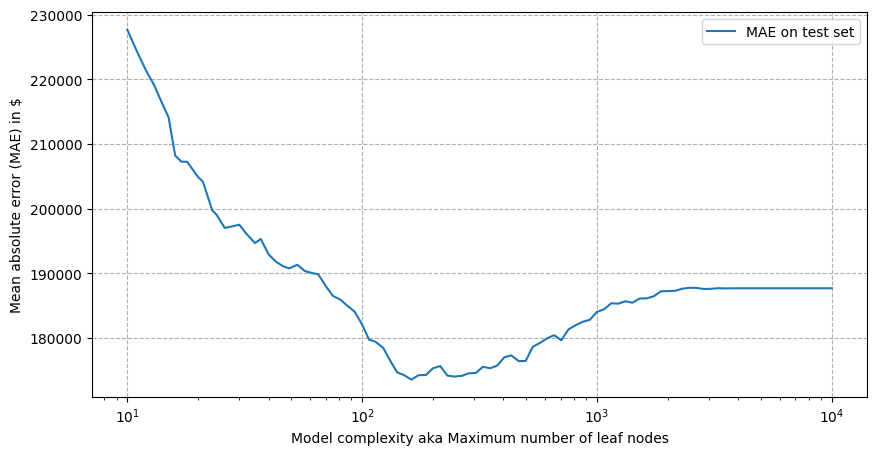

In [90]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    # build the model
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # fit the model on training data
    model.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred_test = model.predict(X_test)
    # compute the mean absolute error
    return mean_absolute_error(y_test, y_pred_test)


leaf_node_sizes = np.logspace(1.0, 4.0, num=100, dtype=int)
mae_test = [get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
            for max_leaf_nodes in leaf_node_sizes]
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xscale('log')
ax.set_xlabel('Model complexity aka Maximum number of leaf nodes')
ax.set_ylabel('Mean absolute error (MAE) in $')
ax.plot(leaf_node_sizes, mae_test, label='MAE on test set')
ax.legend()
ax.grid(linestyle='--')

print(f'Optimal number of leaf nodes: {leaf_node_sizes[np.argmin(mae_test)]:d}')


## Polynomial regression

Repeat the same steps as above, but use a `PolynomialFeatures` transformer to transform the data before fitting the model. Try different degrees for the polynomial feature (e.g. between 0 and 6). Plot the errors on the training and test sets as a function of the degree of the polynomial features.
What is the best degree? How does the error on the training and test sets change with the degree of the polynomial features?


Fitting model with degree 0
Fitting model with degree 1
Fitting model with degree 2
Fitting model with degree 3
Fitting model with degree 4
Fitting model with degree 5
Optimal number of degrees: 2


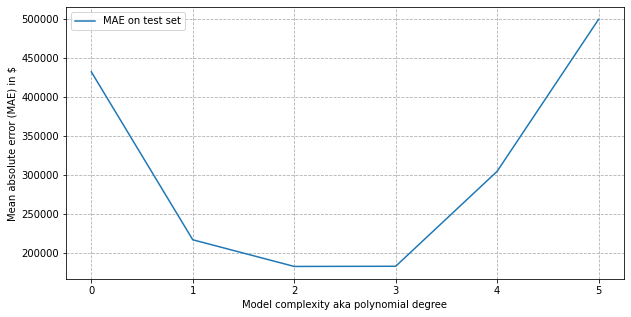

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


def get_mae(degree, X_train, X_test, y_train, y_test):
    # build the model
    print(f'Fitting model with degree {degree:d}')
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # fit the model on training data
    model.fit(X_train, y_train)
    # evaluate the model on test data
    y_pred_test = model.predict(X_test)
    # compute the mean absolute error
    return mean_absolute_error(y_test, y_pred_test)


degrees = np.arange(0, 6)
mae_test = [get_mae(degree, X_train, X_test, y_train, y_test)
            for degree in degrees]

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Model complexity aka polynomial degree')
ax.set_ylabel('Mean absolute error (MAE) in $')
ax.plot(degrees, mae_test, label='MAE on test set')
ax.legend()
ax.grid(linestyle='--')

print(f'Optimal number of degrees: {degrees[np.argmin(mae_test)]:d}')
